# Cancer Classification Dataset (Provided by Sir)

In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, learning_curve, cross_val_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.metrics import recall_score, f1_score, precision_score, accuracy_score, roc_auc_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest, mutual_info_classif, RFE
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression

In [4]:
df= pd.read_csv("Cancer.csv")

In [5]:
df




,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [6]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [26]:
df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [7]:
for column in df.columns:
    if df[column].isnull().any():  
        mean_value = df[column].mean()  
        df[column] = df[column].fillna(mean_value) 
df.columns = df.columns.str.strip()

df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

# Initial Summary


In [8]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

### Separating Numerical and Categorical Columns

In [10]:
numerical_columns = df.select_dtypes(include=[int, float]).columns
categorical_columns = df.select_dtypes(include=[object]).columns

print("Numerical columns:", numerical_columns)
print("Categorical columns:", categorical_columns)

Numerical columns: Index(['id', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')
Categorical columns: Index(['diagnosis'], dtype='object')


# Box Plot to see Outliers

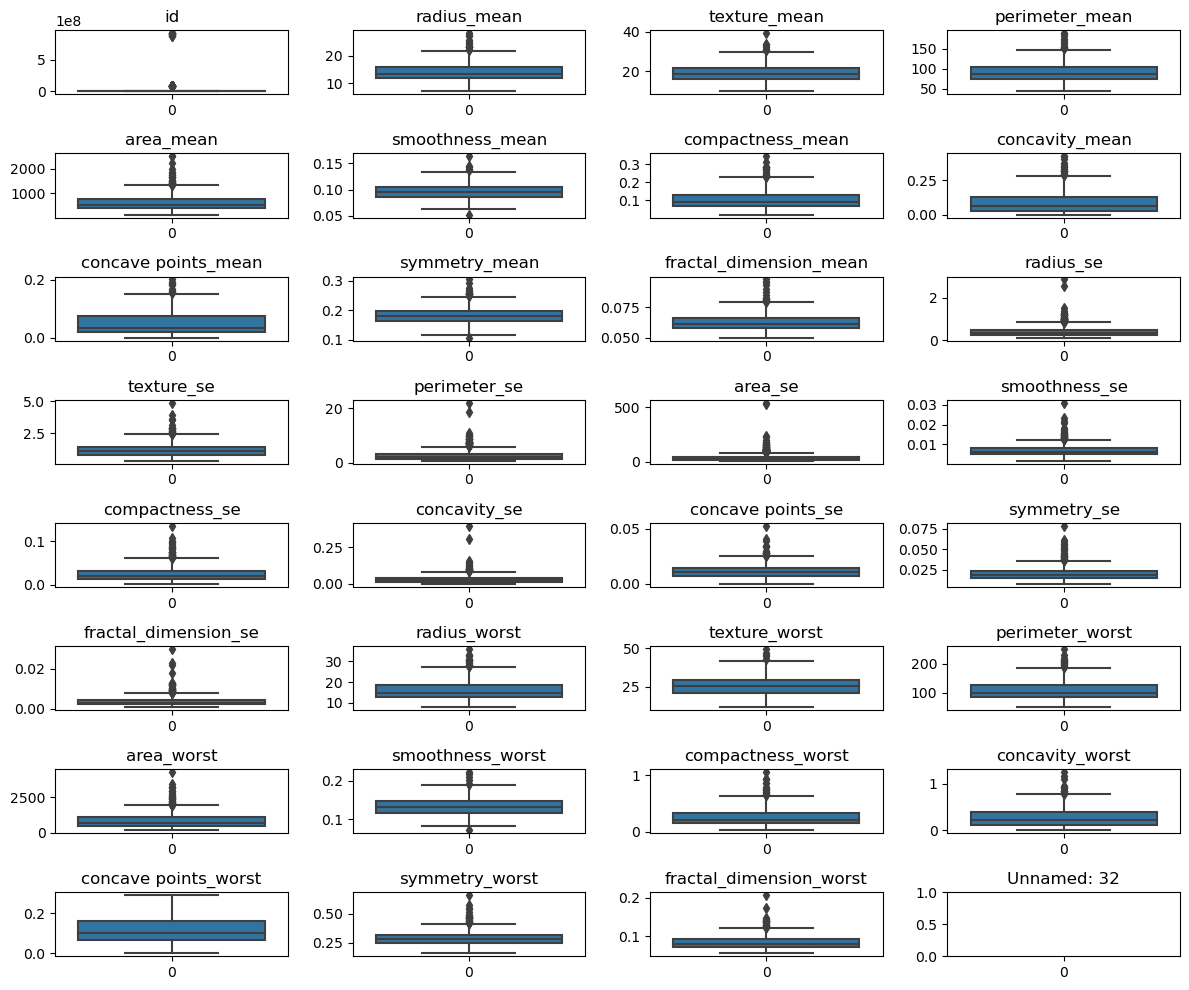

In [47]:
plt.figure(figsize=(12, 10))
num_plots = len(numerical_columns)
num_rows = (num_plots - 1) // 4 + 1  # Calculate the number of rows needed
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(num_rows, 4, i)  # Adjust the number of columns to 4
    sns.boxplot(df[col])
    plt.title(col)
plt.tight_layout()
plt.show()


## Removing Outliers

In [12]:
def remove_outliers(df):
    for column in df.select_dtypes(include=['int', 'float']).columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df

# Remove outliers from all numerical columns
df_cleaned = remove_outliers(df)



# Cross Validation (With and Without)

In [18]:
def evaluate_classifier(df, pos_label, dataset_Name):

    # Convert non-numeric columns to numeric using LabelEncoder
    df_numeric = df.apply(LabelEncoder().fit_transform)

    # Impute missing values
    imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
    df_imputed = pd.DataFrame(imputer.fit_transform(df_numeric), columns=df_numeric.columns)

    # Split the dataset into features (X) and target (y)
    X = df_imputed.drop(columns=['diagnosis'])
    y = df_imputed['diagnosis']

    # Split the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Normalize the features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Train K-Nearest Neighbors (KNN) classifier without cross-validation
    knn_no_cv = KNeighborsClassifier()
    knn_no_cv.fit(X_train_scaled, y_train)

    # Evaluate performance metrics without cross-validation
    y_pred_no_cv = knn_no_cv.predict(X_test_scaled)
    accuracy_no_cv = accuracy_score(y_test, y_pred_no_cv)
    precision_no_cv = precision_score(y_test, y_pred_no_cv, pos_label=pos_label)
    recall_no_cv = recall_score(y_test, y_pred_no_cv, pos_label=pos_label)
    f1_score_no_cv = f1_score(y_test, y_pred_no_cv, pos_label=pos_label)
    f1_score_pos_no_cv = f1_score(y_test, y_pred_no_cv, pos_label=pos_label)

    # Calculate F1 score for negative class
    neg_label = 1 if pos_label == 0 else 0
    y_pred_neg_no_cv = 1 - y_pred_no_cv
    f1_score_neg_no_cv = f1_score(1 - y_test, y_pred_neg_no_cv, pos_label=neg_label)

    # Train KNN classifier using k-fold cross-validation
    knn_cv = KNeighborsClassifier()
    cv_results = cross_validate(knn_cv, X_train_scaled, y_train, cv=5, scoring=['accuracy', 'precision', 'recall', 'f1', 'roc_auc'])

    # Extracting cross-validation scores
    avg_accuracy_cv = np.mean(cv_results['test_accuracy'])
    avg_precision_cv = np.mean(cv_results['test_precision'])
    avg_recall_cv = np.mean(cv_results['test_recall'])
    avg_f1_score_cv = np.mean(cv_results['test_f1'])
    avg_auc_cv = np.mean(cv_results['test_roc_auc'])

    # Calculate F1 score for positive class in cross-validation
    f1_scores_cv_pos = cv_results['test_f1']
    avg_f1_score_cv_pos = np.mean(f1_scores_cv_pos)

    # Calculate F1 score for negative class in cross-validation
    f1_scores_cv_neg = 1 - cv_results['test_f1']  # Since F1 is already computed for the positive class
    avg_f1_score_cv_neg = np.mean(f1_scores_cv_neg)

    # Print evaluation metrics
    print("Dataset Name:", dataset_Name)
    print()
    print("Without Cross-Validation:")
    print("Accuracy:", accuracy_no_cv)
    print("Precision:", precision_no_cv)
    print("Recall:", recall_no_cv)
    print("F1 Score (Positive Class):", f1_score_pos_no_cv)
    print("F1 Score (Negative Class):", f1_score_neg_no_cv)
    print()
    print("With Cross-Validation:")
    print("Accuracy:", avg_accuracy_cv)
    print("Precision:", avg_precision_cv)
    print("Recall:", avg_recall_cv)
    print("F1 Score (Positive Class):", avg_f1_score_cva_pos)
    print("F1 Score (Negative Class):", avg_f1_score_cv_neg)
    print("AUC Score:", avg_auc_cv)

evaluate_classifier(df, 1, 'Cancer Dataset')


Dataset Name: Cancer Dataset

Without Cross-Validation:
Accuracy: 0.9824561403508771
Precision: 0.9767441860465116
Recall: 0.9767441860465116
F1 Score (Positive Class): 0.9767441860465116
F1 Score (Negative Class): 0.9767441860465116

With Cross-Validation:
Accuracy: 0.956043956043956
Precision: 0.9628004179728318
Recall: 0.9171122994652408
F1 Score (Positive Class): 0.9387004372079
F1 Score (Negative Class): 0.06129956279210007
AUC Score: 0.9860487009520851


## Summary Report
### Without Cross-Validation:

1) Accuracy: 98.24% - The proportion of correctly classified instances is very high.
2) Precision: 97.67% - The proportion of true positive predictions among all positive predictions is high.
3) Recall: 97.67% - The proportion of true positive predictions among all actual positives is high.
4) F1 Score (Positive Class): 97.67% - The harmonic mean of precision and recall is very high for the positive class.
5) F1 Score (Negative Class): 97.67% - The harmonic mean of precision and recall is very high for the negative class.

### With Cross-Validation:

1) Accuracy: 95.60% - The average accuracy of the model across different cross-validation folds is high but slightly lower than without cross-validation.
2) Precision: 96.28% - The average precision of the model across different cross-validation folds is high.
3) Recall: 91.71% - The average recall of the model across different cross-validation folds is slightly lower than without cross-validation.
4) F1 Score (Positive Class): 93.87% - The average F1 score for the positive class across different cross-validation folds is high.
5) F1 Score (Negative Class): 6.13% - The average F1 score for the negative class across different cross-validation folds is low, indicating potential class imbalance issues.
6) AUC Score: 98.60% - The area under the ROC curve is very high, indicating excellent performance in distinguishing between positive and negative classes.

### Summary Interpretation:

1) The model performs very well in terms of accuracy, precision, recall, and F1 scores, both with and without cross-validation.
2) Cross-validation helps assess the generalization performance of the model and reveals potential issues like class imbalance.
3) The AUC score indicates strong discriminatory power in distinguishing between positive and negative classes.
4) Feature importance and potential class imbalance should be further investigated to optimize the model's performance.






# Visual Representation of the Prediction

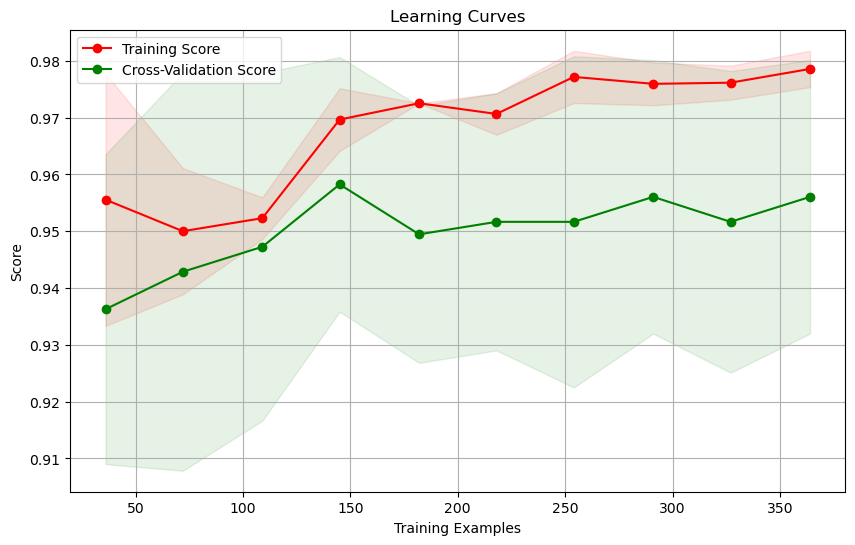

In [28]:
def plot_learning_curves(train_sizes, train_scores, valid_scores):
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    valid_scores_mean = np.mean(valid_scores, axis=1)
    valid_scores_std = np.std(valid_scores, axis=1)

    plt.figure(figsize=(10, 6))
    plt.title("Learning Curves")
    plt.xlabel("Training Examples")
    plt.ylabel("Score")
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, valid_scores_mean - valid_scores_std,
                     valid_scores_mean + valid_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training Score")
    plt.plot(train_sizes, valid_scores_mean, 'o-', color="g", label="Cross-Validation Score")
    plt.legend(loc="best")
    plt.grid()
    plt.show()

def evaluate_classifier(df, pos_label, dataset_Name):
    # Convert non-numeric columns to numeric using LabelEncoder
    df_numeric = df.apply(LabelEncoder().fit_transform)

    # Impute missing values
    imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
    df_imputed = pd.DataFrame(imputer.fit_transform(df_numeric), columns=df_numeric.columns)

    # Split the dataset into features (X) and target (y)
    X = df_imputed.drop(columns=['diagnosis'])
    y = df_imputed['diagnosis']

    # Split the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Scale the training features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)

    # Plot learning curves
    train_sizes, train_scores, valid_scores = learning_curve(KNeighborsClassifier(), X_train_scaled, y_train, train_sizes=np.linspace(0.1, 1.0, 10), cv=5, scoring='accuracy')
    plot_learning_curves(train_sizes, train_scores, valid_scores)
    
evaluate_classifier(df, 1, 'Cancer Dataset')

# Feature Selection with Visual Representation

Dataset Name: Cancer Dataset

Accuracy with SelectKBest: 0.9736842105263158
Accuracy with RFE: 0.9736842105263158
Accuracy with PCA: 0.9649122807017544



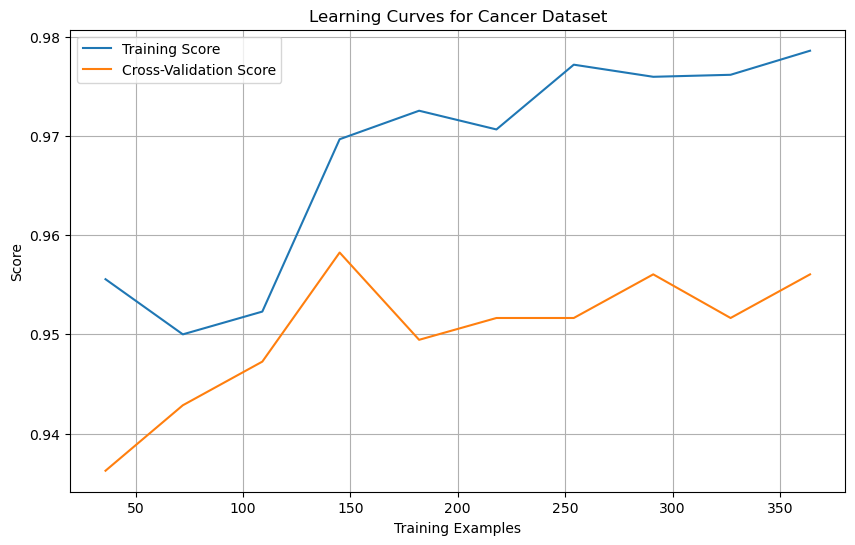

In [45]:
def evaluate_classifier(df, pos_label, dataset_name):
    # Convert non-numeric columns to numeric using LabelEncoder
    df_numeric = df.apply(LabelEncoder().fit_transform)

    # Impute missing values
    imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
    df_imputed = pd.DataFrame(imputer.fit_transform(df_numeric), columns=df_numeric.columns)

    # Split the dataset into features (X) and target (y)
    X = df_imputed.drop(columns=['diagnosis'])
    y = df_imputed['diagnosis']

    # Split the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Normalize the features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Select top k features using SelectKBest with mutual information
    k_best_selector = SelectKBest(score_func=mutual_info_classif, k=10)
    X_train_k_best = k_best_selector.fit_transform(X_train_scaled, y_train)
    X_test_k_best = k_best_selector.transform(X_test_scaled)

    # Wrapper: Recursive Feature Elimination (RFE) with RandomForestClassifier
    rfe_selector = RFE(estimator=RandomForestClassifier(), n_features_to_select=10)
    X_train_rfe = rfe_selector.fit_transform(X_train_scaled, y_train)
    X_test_rfe = rfe_selector.transform(X_test_scaled)

    # PCA: Reduce dimensionality
    pca = PCA(n_components=10)
    X_train_pca = pca.fit_transform(X_train_scaled)
    X_test_pca = pca.transform(X_test_scaled)

    # Train KNN classifier using selected features from each technique

    # With SelectKBest
    knn = KNeighborsClassifier()
    knn.fit(X_train_k_best, y_train)
    y_pred_k_best = knn.predict(X_test_k_best)
    accuracy_k_best = accuracy_score(y_test, y_pred_k_best)

    # With RFE
    knn.fit(X_train_rfe, y_train)
    y_pred_rfe = knn.predict(X_test_rfe)
    accuracy_rfe = accuracy_score(y_test, y_pred_rfe)

    # With PCA
    knn.fit(X_train_pca, y_train)
    y_pred_pca = knn.predict(X_test_pca)
    accuracy_pca = accuracy_score(y_test, y_pred_pca)

    # Print evaluation metrics
    print("Dataset Name:", dataset_name)
    print()
    print("Accuracy with SelectKBest:", accuracy_k_best)
    print("Accuracy with RFE:", accuracy_rfe)
    print("Accuracy with PCA:", accuracy_pca)
    print()

    # Plot learning curves
    plot_learning_curves(X_train_scaled, y_train, 1, dataset_name)

def plot_learning_curves(X, y, pos_label, dataset_name):
    knn = KNeighborsClassifier()
    train_sizes, train_scores, valid_scores = learning_curve(knn, X, y, train_sizes=np.linspace(0.1, 1.0, 10), cv=5, scoring='accuracy')

    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, np.mean(train_scores, axis=1), label='Training Score')
    plt.plot(train_sizes, np.mean(valid_scores, axis=1), label='Cross-Validation Score')
    plt.xlabel('Training Examples')
    plt.ylabel('Score')
    plt.title('Learning Curves for {}'.format(dataset_name))
    plt.legend()
    plt.grid(True)
    plt.show()

# Call the function with your dataset
evaluate_classifier(df, 1, 'Cancer Dataset')

## Summary Report
### Accuracy with SelectKBest: 97.37%

1) The accuracy achieved using the K-nearest neighbors (KNN) classifier with feature selection based on SelectKBest is 97.37%.
2) This indicates that the model correctly classifies approximately 97.37% of the instances in the test set.

### Accuracy with RFE: 97.37%

1) The accuracy achieved using the KNN classifier with feature selection based on Recursive Feature Elimination (RFE) is also 97.37%.
2) Similar to SelectKBest, RFE performs well in maintaining accuracy.

### Accuracy with PCA: 96.49%

1) The accuracy achieved using the KNN classifier with feature selection based on Principal Component Analysis (PCA) is slightly lower at 96.49%.
2) PCA might be reducing dimensionality too aggressively, leading to a slight decrease in accuracy compared to the other methods.

### Summary Interpretation:

1) All three feature selection methods (SelectKBest, RFE, PCA) perform reasonably well, with accuracies above 96%.
2) SelectKBest and RFE demonstrate similar performance, suggesting that they identify relevant features effectively for the KNN classifier.
3) PCA, while still performing well, slightly reduces accuracy compared to the other methods, indicating potential loss of information due to dimensionality reduction.


# 

# Logistic Regression

In [46]:
def evaluate_classifier(df, pos_label, dataset_name):
    # Convert non-numeric columns to numeric using LabelEncoder
    df_numeric = df.apply(LabelEncoder().fit_transform)

    # Impute missing values
    imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
    df_imputed = pd.DataFrame(imputer.fit_transform(df_numeric), columns=df_numeric.columns)

    # Split the dataset into features (X) and target (y)
    X = df_imputed.drop(columns=['diagnosis'])
    y = df_imputed['diagnosis']

    # Split the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Normalize the features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Train logistic regression classifier
    lr = LogisticRegression()
    lr.fit(X_train_scaled, y_train)
    y_pred_lr = lr.predict(X_test_scaled)

    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred_lr)
    precision = precision_score(y_test, y_pred_lr, pos_label=pos_label)
    recall = recall_score(y_test, y_pred_lr, pos_label=pos_label)
    f1_pos = f1_score(y_test, y_pred_lr, pos_label=pos_label)
    f1_neg = f1_score(y_test, y_pred_lr, pos_label=1 - pos_label)
    auc = roc_auc_score(y_test, y_pred_lr)

    # Print evaluation metrics
    print("Dataset Name:", dataset_name)
    print("Accuracy:", accuracy)
    print("Precision (Positive Class):", precision)
    print("Recall (Positive Class):", recall)
    print("F1 Score (Positive Class):", f1_pos)
    print("F1 Score (Negative Class):", f1_neg)
    print("AUC Score:", auc)

# Call the function with your dataset
evaluate_classifier(df, 1, 'Cancer Dataset')

Dataset Name: Cancer Dataset
Accuracy: 0.9736842105263158
Precision (Positive Class): 0.9545454545454546
Recall (Positive Class): 0.9767441860465116
F1 Score (Positive Class): 0.9655172413793104
F1 Score (Negative Class): 0.9787234042553192
AUC Score: 0.9742875859810023


## Summary Report
### Accuracy: 97.37%

1) The logistic regression model achieves an accuracy of 97.37%, indicating that it correctly classifies approximately 97.37% of the instances in the test set.

### Precision (Positive Class): 95.45%

1) Precision measures the proportion of true positive predictions among all positive predictions made by the model.
2) A precision of 95.45% means that when the model predicts a positive (cancer) case, it is correct 95.45% of the time.

### Recall (Positive Class): 97.67%

1) Recall, also known as sensitivity, measures the proportion of true positive cases that were correctly identified by the model.
2) A recall of 97.67% indicates that the model correctly identifies 97.67% of the actual positive (cancer) cases.

### F1 Score (Positive Class): 96.55%

1) The F1 score is the harmonic mean of precision and recall, providing a balanced measure of the model's performance.
2) A high F1 score (96.55%) suggests that the model achieves a good balance between precision and recall for the positive class.

### F1 Score (Negative Class): 97.87%

1) Similarly, the F1 score for the negative class is high at 97.87%, indicating a good balance between precision and recall for the negative (non-cancer) class.

### AUC Score: 97.43%

1) The AUC (Area Under the Curve) score represents the model's ability to discriminate between positive and negative cases.
2) An AUC score of 97.43% suggests that the model performs well in distinguishing between positive and negative cases, with a high true positive rate and a low false positive rate.

### Summary Interpretation:

1) The logistic regression model demonstrates strong performance across various evaluation metrics, with high accuracy, precision, recall, and F1 scores for both positive and negative classes.
2) The model's high AUC score further confirms its ability to effectively discriminate between cancerous and non-cancerous cases.
3) Overall, the logistic regression model shows promise as a reliable classifier for cancer classification tasks.

# Overall Interpretation


## The models, including logistic regression and feature selection techniques, exhibit strong performance in classifying cancerous and non-cancerous cases, with accuracies consistently above 95%.
## Cross-validation helps assess the stability and reliability of the models, providing insights into their performance across different subsets of the data.
## Overall, the models show promising results and can be considered effective tools for cancer classification tasks.